In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\GlazkovOI\\#MyProjectAirflow\\itmo\\lawnmower_var_135223.csv')

In [3]:
df.head()

,NAME,WIDTH,PRICE,POWER,GRASS,AREA,DESCRIPTION
0,Champion NPI256,41.0,22000.0,1.55,30.0,450.0,Широкая полоса скашивания на данной газонокоси...
1,Nakita CPA252,44.0,37000.0,1.85,60.0,400.0,Широкая полоса скашивания на данной газонокоси...
2,Champion XUB235,33.0,15000.0,1.50,40.0,600.0,Узкая ширина скашиваемой полосы на данной газо...
3,Gardez GYW727,NaN,39000.0,1.65,50.0,200.0,Широкая полоса скашивания на данной газонокоси...
4,Gardez WBB365,30.0,25000.0,1.45,70.0,350.0,Узкая ширина скашиваемой полосы на данной газо...


Описание полей таблицы:

- Название газонокосилки — NAME
- Ширина скашиваемой полосы — WIDTH
- Стоимость — PRICE
- Мощность — POWER
- Объем травосборника — GRASS
- Площадь скашиваемой поверхности на одном заряде аккумулятора — AREA
- Описание газонокосилки — DESCRIPTION

1. Параметр "Ширина скашиваемой полосы" содержит много пропущенных значений

- Если в описании газонокосилки встречались слова "узкая"/"узкие", то значение восстанавливалось как медиана по существующим в исходном датасете значениям в диапазоне от 30 до 35. Введите медиану по существующим в исходном датасете значениям в диапазоне от 30 до 35.
- Если встречались слова "средняя ширина"/"ширина средняя", то значение восстанавливалось как округленное до целого среднее арифметическое по существующим значениям в диапазоне от 36 до 40. Введите округленное до целого среднее арифметическое по существующим в исходном датасете значениям в диапазоне от 36 до 40.
- Если встречались слова ("широкая" и "полоса")/("широкие" и "полосы"), то значение восстанавливалось как медиана по существующим значениям в диапазоне от 41 до 45. Введите медиану по существующим в исходном датасете значениям в диапазоне от 41 до 45.
- Введите среднее арифметическое для параметра "Ширина скашиваемой полосы" после восстановления пропущенных значений

Посчитаем количество пустых - NaN

In [4]:
df.WIDTH.isna().value_counts()

False    180
True      20
Name: WIDTH, dtype: int64

Определим новый датафрейм содержащий только пустые

In [5]:
column_of_interest = df.columns[df.isna().any()][0]
column_of_interest

'WIDTH'

In [6]:
df_new = df.loc[np.where(df[column_of_interest].isna())]
df_new.head()

,NAME,WIDTH,PRICE,POWER,GRASS,AREA,DESCRIPTION
3,Gardez GYW727,NaN,39000.0,1.65,50.0,200.0,Широкая полоса скашивания на данной газонокоси...
13,Boch ATS658,NaN,45000.0,1.20,30.0,250.0,Узкая ширина скашиваемой полосы на данной газо...
25,Nakita MHM126,NaN,NaN,NaN,40.0,400.0,Широкая полоса скашивания на данной газонокоси...
33,Champion IIA763,NaN,10000.0,1.40,50.0,550.0,Широкая полоса скашивания на данной газонокоси...
40,Bear ELB654,NaN,37000.0,1.85,25.0,550.0,Узкая ширина скашиваемой полосы на данной газо...


In [7]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NAME         200 non-null    object 
 1   WIDTH        180 non-null    float64
 2   PRICE        194 non-null    float64
 3   POWER        198 non-null    float64
 4   GRASS        199 non-null    float64
 5   AREA         196 non-null    float64
 6   DESCRIPTION  200 non-null    object 
dtypes: float64(5), object(2)
memory usage: 11.1+ KB


Text(0.5, 1.0, 'Распределение WIDTH до заполнения пропусков')

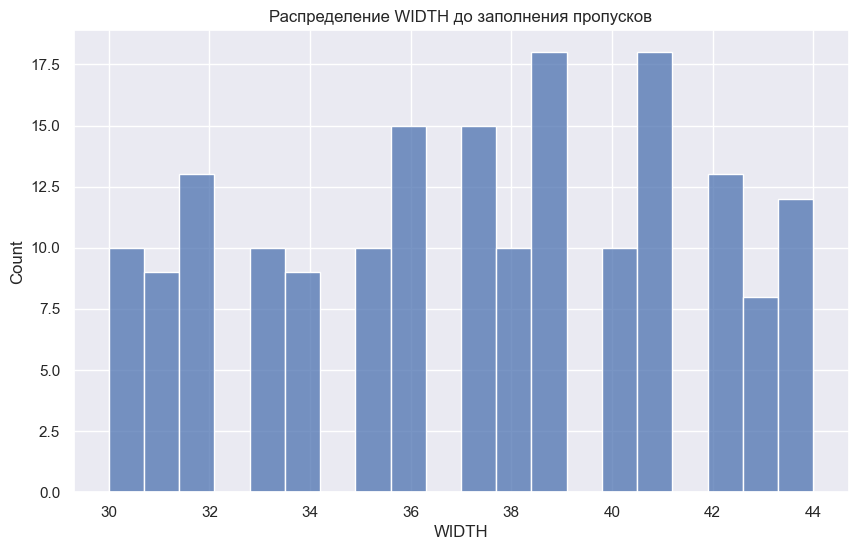

In [8]:
sns.set(rc = {'figure.figsize' : (10, 6)})
sns.histplot(df1.WIDTH, bins = 20)
plt.title('Распределение WIDTH до заполнения пропусков')

In [9]:
df1.WIDTH.mean(), df1.WIDTH.median()

(37.3, 37.0)

In [10]:
df2 = df1.loc[(df1['WIDTH'] >= 30) & (df1['WIDTH'] <= 35)]
df3 = df1.loc[(df1['WIDTH'] >= 36) & (df1['WIDTH'] <= 40)]
df4 = df1.loc[(df1['WIDTH'] >= 41) & (df1['WIDTH'] <= 45)]

In [11]:
df2.WIDTH.median(), round(df3.WIDTH.mean()), df4.WIDTH.median()

(32.0, 38, 42.0)

In [12]:
pattern1 = re.compile(r'узкая | узкие', re.IGNORECASE)
pattern2 = re.compile(r'средняя ширина | ширина средняя', re.IGNORECASE)
pattern3 = re.compile(r'широкая полоса | широкие полосы', re.IGNORECASE)

In [13]:
df1['WIDTH'].fillna(df2.WIDTH.median(), inplace = True)

In [14]:
df1['DESCRIPTION'].apply(lambda x: re.search(pattern1, x))

0                                                None
1                                                None
2      <re.Match object; span=(0, 6), match='Узкая '>
3                                                None
4      <re.Match object; span=(0, 6), match='Узкая '>
                            ...                      
195    <re.Match object; span=(0, 6), match='Узкая '>
196                                              None
197                                              None
198    <re.Match object; span=(0, 6), match='Узкая '>
199                                              None
Name: DESCRIPTION, Length: 200, dtype: object

In [16]:
df1.head()

,NAME,WIDTH,PRICE,POWER,GRASS,AREA,DESCRIPTION
0,Champion NPI256,41.0,22000.0,1.55,30.0,450.0,Широкая полоса скашивания на данной газонокоси...
1,Nakita CPA252,44.0,37000.0,1.85,60.0,400.0,Широкая полоса скашивания на данной газонокоси...
2,Champion XUB235,33.0,15000.0,1.50,40.0,600.0,Узкая ширина скашиваемой полосы на данной газо...
3,Gardez GYW727,32.0,39000.0,1.65,50.0,200.0,Широкая полоса скашивания на данной газонокоси...
4,Gardez WBB365,30.0,25000.0,1.45,70.0,350.0,Узкая ширина скашиваемой полосы на данной газо...


In [15]:
# sns.set(rc = {'figure.figsize' : (10, 6)})
# sns.histplot(df1.WIDTH, bins = 20)
# plt.title('Распределение WIDTH после заполнения пропусков')